In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Camino Aleatorio

Se simulan cuatros distintos caminos aleatorios unidimensionales siguiendo una distribución Normal Estándar. Para esto se genera un arreglo de 400 elementos utilizando la función _**random.normal**_ de la librería _**Numpy**_, donde los primeros 100 números determinarán los pasos del primer camino aleatorio, los segundos 100 números determinarán los pasos del segundo camino aleatorio y así hasta tener los pasos de los cuatro caminos.

Dada la simetría en torno al 0 de la distribución Normal Estándar, la manera de determinar hacia donde se camina en cada paso es la siguiente: Si el número es menor a 0 se caminará hacia atrás en el eje de abscisas. En caso contrario se caminará hacia adelante en el eje antes mencionado. 

In [19]:
normal = np.random.normal(0,1,400) 
        
x = list(range(100))
y1 = [0]
y2 = [0]
y3 = [0]
y4 = [0]

contador = 0
for i in range(400):
    if i == 99 or i == 199 or i == 299:
        contador = 0
    if normal[i] < 0:
        contador -= 1
        if i < 100:
            y1.append(contador)
        elif i < 200:
            y2.append(contador)
        elif i < 300:
            y3.append(contador)
        else:
            y4.append(contador)
    else:  
        contador += 1
        if i < 100:
            y1.append(contador)
        elif i < 200:
            y2.append(contador)
        elif i < 300:
            y3.append(contador)
        else:
            y4.append(contador)

y1.remove(y1[-1])
y2.remove(y2[-1])
y3.remove(y3[-1])
y4.remove(y4[-1])
            


Para cada camino, se guardan los 100 valores de los desplazamientos. De esta manera se procede a graficar desplazamiento versus tiempo para los cuatro caminos.

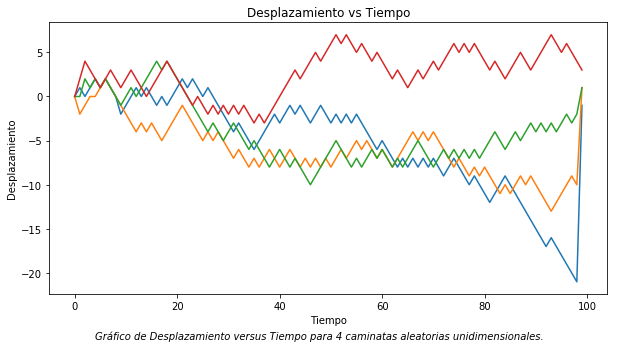

In [20]:
caption = "Gráfico de Desplazamiento versus Tiempo para 4 caminatas aleatorias unidimensionales."    
fig = plt.figure(figsize=(10,5)) 
fig.text(.5,.001, caption, ha="center",style="oblique")
plt.title("Desplazamiento vs Tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Desplazamiento")
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.show()

Luego, se desea estudiar caminos aleatorios bidimensionales y tridimensionales, principalmente la probabilidad de volver al punto inicial dada una cierta cantidad de pasos.

Para simular estas caminatas se utilizará una función que elegirá entre -1 y 1 de manera uniforme. 


In [21]:
def choice():
    return np.random.choice([1,-1])


Utilizando la función anterior, se decidirá la trayectoria en los casos bidimensionales y tridimensionales. En el caso bidimensional se realizará de la siguiente manera.

- Se utilizará dos veces la función Choice.
    - Con esto se obtendrá un vector de movimiento, el cual podrá ser una de las cuatro diagonales, cada una equiprobables de ser elegidas.


In [22]:

def pasoBidimensional(posicionActual):
    a = choice()
    b = choice()
    posicionActual[0] += a
    posicionActual[1] += b
            

           

Utilizando lo anterior se simulan 10000 caminatas aleatorias, cada una con 500 pasos máximos, donde el caminante partirá desde el punto (0, 0). Los resultados se almacenan en la lista _**"volvio"**_, guardando un 1 si el caminante logró volver al origen y 0 si no. Además se almacenan la cantidad de pasos necesarios en la lista _**"pasos2D"**_.

Luego, se calcula la probabilidad de que el caminante vuelva al origen en un paseo de 500 pasos máximos utilizando la definición de probabilidad empírica.

In [23]:
volvio = []
pasos2D = []
for j in range(10000):
    posicion = [0,0]
    flagVolvio = False
    for i in range(500):  
        pasoBidimensional(posicion)
        if posicion[0] == 0 and posicion[1] == 0:
            volvio.append(1)
            pasos2D.append(i + 1)
            flagVolvio = True
            break
    if flagVolvio == False:
        volvio.append(0)
        pasos2D.append(500)
        
print("La probabilidad de volver al origen es de: "+str(sum(volvio)/len(volvio)))          


La probabilidad de volver al origen es de: 0.6574


Para el caso tridimensional se sigue el mismo razonamiento utilizado para el caso bidimensional, pero en este caso de utilizará 3 veces la función _**choice**_. En este caso se obtendrá un vector movimiento que definirá el movimiento por una de las ocho "diagonales" presentes en un modelo 3D.

In [24]:
def pasoTridimensional(posicionActual):
    a = choice()
    b = choice()
    c = choice()
    posicionActual[0] += a
    posicionActual[1] += b
    posicionActual[2] += c

En este caso también se hacen 10000 simulaciones con un tope de pasos de 500. La manera de almacenar los resultados es la misma que en el caso bidimiensional, en este caso los resultados se guardarán en los arreglos _**volvio3D**_ y _**pasos3D**_.

In [25]:
volvio3D = []
pasos3D = []
for j in range(10000):
    posicion = [0,0,0]
    flagVolvio = False
    for i in range(500):  
        pasoTridimensional(posicion)
        if posicion[0] == 0 and posicion[1] == 0 and posicion[2] == 0:
            volvio3D.append(1)
            pasos3D.append(i + 1)
            flagVolvio = True
            break
    if flagVolvio == False:
        volvio3D.append(0)
        pasos3D.append(500)
        
print("La probabilidad de volver al origen es de: "+str(sum(volvio3D)/len(volvio3D)))        

La probabilidad de volver al origen es de: 0.2728


Por último, Pòlya (1921)[2] demostró que la probabilidad de volver al origen en una caminata aleatoria unidimensional y bidimensional es 1, por lo que es de esperar que a medida que se aumenta la cantidad de pasos la probabilidad de volver al origen en el caso bidimensional aumente. Por otro lado Montroll (1956)[3] demostró que la probabilidad de volver al origen en el caso tridimensional es aproximadamente $0.340537$, por lo que al aumentar la cantidad de pasos máximos se debería converger a dicho valor. 

